In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import librosa
import librosa.display
import IPython.display as ipd
import os
import sklearn
import json
import pickle

In [66]:
train_data = pd.read_csv('/content/train_metadata.csv')
train_data.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
0,afrsil1,[],"['call', 'flight call']",12.3910,-1.4930,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,2.5,08:00,https://www.xeno-canto.org/125458,afrsil1/XC125458.ogg
1,afrsil1,"['houspa', 'redava', 'zebdov']",['call'],19.8801,-155.7254,Euodice cantans,African Silverbill,Dan Lane,Creative Commons Attribution-NonCommercial-Sha...,3.5,08:30,https://www.xeno-canto.org/175522,afrsil1/XC175522.ogg
2,afrsil1,[],"['call', 'song']",16.2901,-16.0321,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:30,https://www.xeno-canto.org/177993,afrsil1/XC177993.ogg
3,afrsil1,[],"['alarm call', 'call']",17.0922,54.2958,Euodice cantans,African Silverbill,Oscar Campbell,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:00,https://www.xeno-canto.org/205893,afrsil1/XC205893.ogg
4,afrsil1,[],['flight call'],21.4581,-157.7252,Euodice cantans,African Silverbill,Ross Gallardy,Creative Commons Attribution-NonCommercial-Sha...,3.0,16:30,https://www.xeno-canto.org/207431,afrsil1/XC207431.ogg


In [67]:
test_data = pd.read_csv('/content/train_metadata.csv')
test_data.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
0,afrsil1,[],"['call', 'flight call']",12.3910,-1.4930,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,2.5,08:00,https://www.xeno-canto.org/125458,afrsil1/XC125458.ogg
1,afrsil1,"['houspa', 'redava', 'zebdov']",['call'],19.8801,-155.7254,Euodice cantans,African Silverbill,Dan Lane,Creative Commons Attribution-NonCommercial-Sha...,3.5,08:30,https://www.xeno-canto.org/175522,afrsil1/XC175522.ogg
2,afrsil1,[],"['call', 'song']",16.2901,-16.0321,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:30,https://www.xeno-canto.org/177993,afrsil1/XC177993.ogg
3,afrsil1,[],"['alarm call', 'call']",17.0922,54.2958,Euodice cantans,African Silverbill,Oscar Campbell,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:00,https://www.xeno-canto.org/205893,afrsil1/XC205893.ogg
4,afrsil1,[],['flight call'],21.4581,-157.7252,Euodice cantans,African Silverbill,Ross Gallardy,Creative Commons Attribution-NonCommercial-Sha...,3.0,16:30,https://www.xeno-canto.org/207431,afrsil1/XC207431.ogg


In [68]:
taxonomy = pd.read_csv('/content/eBird_Taxonomy_v2021.csv')
taxonomy.head()

,TAXON_ORDER,CATEGORY,SPECIES_CODE,PRIMARY_COM_NAME,SCI_NAME,ORDER1,FAMILY,SPECIES_GROUP,REPORT_AS
0,1,species,ostric2,Common Ostrich,Struthio camelus,Struthioniformes,Struthionidae (Ostriches),Ostriches,NaN
1,6,species,ostric3,Somali Ostrich,Struthio molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
2,7,slash,y00934,Common/Somali Ostrich,Struthio camelus/molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
3,8,species,grerhe1,Greater Rhea,Rhea americana,Rheiformes,Rheidae (Rheas),Rheas,NaN
4,14,species,lesrhe2,Lesser Rhea,Rhea pennata,Rheiformes,Rheidae (Rheas),NaN,NaN


In [69]:
rated_train_data = train_data[train_data['rating'] >= 3]
rated_train_data.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
1,afrsil1,"['houspa', 'redava', 'zebdov']",['call'],19.8801,-155.7254,Euodice cantans,African Silverbill,Dan Lane,Creative Commons Attribution-NonCommercial-Sha...,3.5,08:30,https://www.xeno-canto.org/175522,afrsil1/XC175522.ogg
2,afrsil1,[],"['call', 'song']",16.2901,-16.0321,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:30,https://www.xeno-canto.org/177993,afrsil1/XC177993.ogg
3,afrsil1,[],"['alarm call', 'call']",17.0922,54.2958,Euodice cantans,African Silverbill,Oscar Campbell,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:00,https://www.xeno-canto.org/205893,afrsil1/XC205893.ogg
4,afrsil1,[],['flight call'],21.4581,-157.7252,Euodice cantans,African Silverbill,Ross Gallardy,Creative Commons Attribution-NonCommercial-Sha...,3.0,16:30,https://www.xeno-canto.org/207431,afrsil1/XC207431.ogg
5,afrsil1,[],['flight call'],21.4581,-157.7252,Euodice cantans,African Silverbill,Ross Gallardy,Creative Commons Attribution-NonCommercial-Sha...,4.0,16:30,https://www.xeno-canto.org/207432,afrsil1/XC207432.ogg


In [70]:
totalcount = rated_train_data['rating'].count()
totalcount

12646

In [71]:
nullcount = rated_train_data['rating'].isnull().sum()
nullcount

0

In [72]:
distribution = rated_train_data['rating'].value_counts()
distribution

,count
rating,
4.0,3974
5.0,3318
3.0,1957
3.5,1765
4.5,1632


Text(0, 0.5, 'Count')

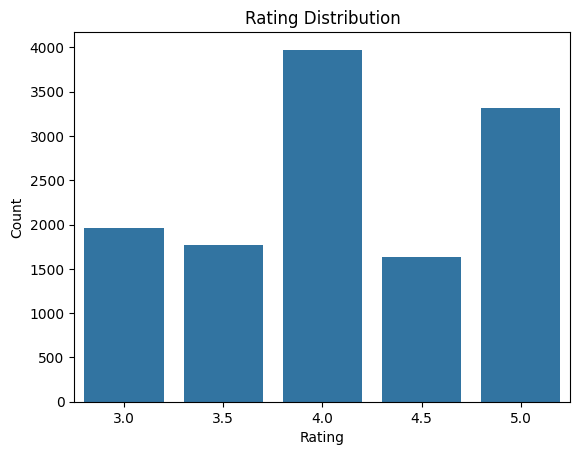

In [73]:
plot = sns.countplot(x = 'rating', data = rated_train_data)
plot.set_title('Rating Distribution')
plot.set_xlabel('Rating')
plot.set_ylabel('Count')

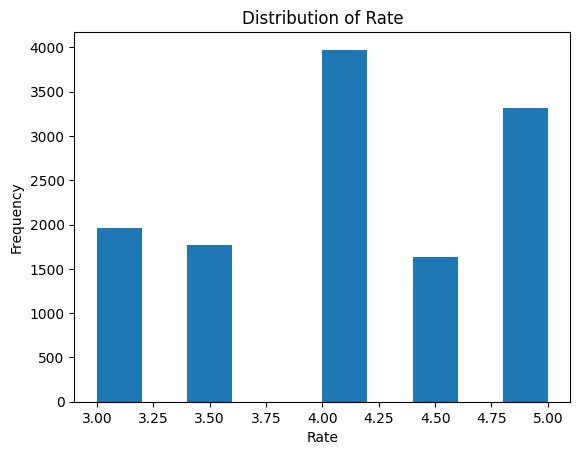

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
rating = rated_train_data['rating']

rating = rating[rating >= 3]

plt.hist(rating, bins=10)
plt.xlabel("Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Rate") # Adjust title if filtering for ratings >= 4
plt.show()

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
base_dir = '/content/drive/MyDrive/BirdCLEF 2022/birdclef-2022/train_audio'
rated_train_data['full_path'] = base_dir + '/' + rated_train_data['filename']
akepa1 = rated_train_data[rated_train_data['primary_label'] == "akepa1"].sample(1, random_state=33)['full_path'].values[0]
print(f"Trying to load audio from: {akepa1}")

Trying to load audio from: /content/drive/MyDrive/BirdCLEF 2022/birdclef-2022/train_audio/akepa1/XC175513.ogg


In [77]:
y, sr = librosa.load(akepa1)
ipd.Audio(akepa1)
print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')
print('Check Len of Audio:', np.shape(y)[0]/sr)

y: [ 1.4469982e-05 -1.8453087e-05 -9.5257610e-07 ...  8.7022141e-05
  1.2195816e-04  0.0000000e+00] 

y shape: (1349569,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 61.2049433106576


In [78]:
y_akepa1, sr_akepa1 = librosa.load(akepa1)

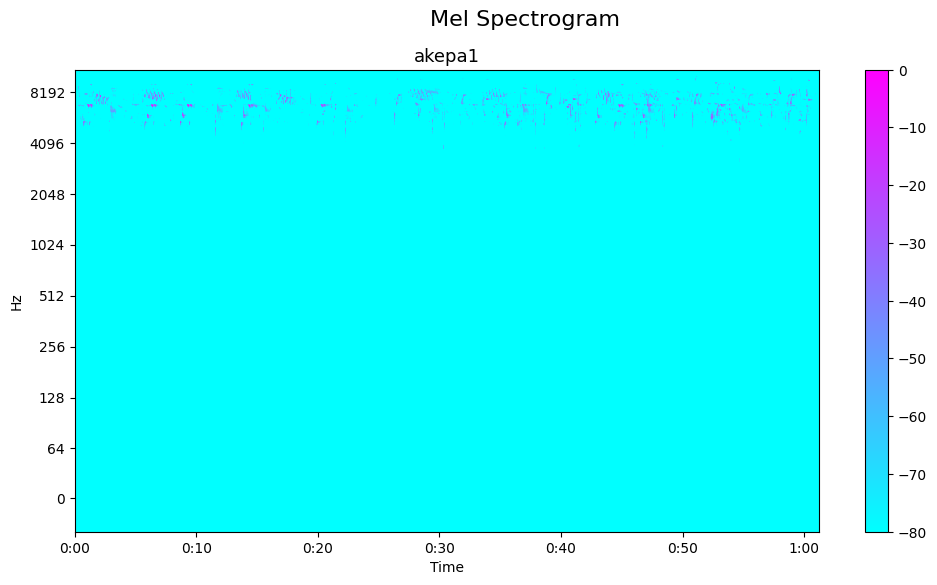

In [79]:
hop_length = 512

S_akepa1 = librosa.feature.melspectrogram(y=y_akepa1, sr=sr_akepa1)

#db scale
S_DB_akepa1 = librosa.amplitude_to_db(S_akepa1, ref=np.max)

# Create and display the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle('Mel Spectrogram', fontsize=16)
img = librosa.display.specshow(S_DB_akepa1, sr=sr_akepa1, hop_length=hop_length,
                                 x_axis='time', y_axis='log', cmap='cool', ax=ax)
ax.set_title('akepa1', fontsize=13)
plt.colorbar(img, ax=ax)
plt.show()